# Pymaceuticals Inc.

## Observations and analyses

With the tables and calculations observed by the dataset given to us, the following analyses were noted for the 249 (noted to be 248 after review of duplicates) mice over the course of a period of 45 days. 
The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens. The following conclusions were made: 

1. Capomulin and Ramicaine were the most effective drug regimen to reduce the volume of the SCC within 45 days. The standard of deviation and variance also implied that there was less chance of variance of results with these drug regimes for each mice. 

2. Ketapril and Naftisol were noted to have similar statistics to the mice having a placebo, therefore noting as the "least effective" drug regimen over 45 days to reduce the tumour volume size. It is interesting to note however, that despite Ketapril and Naftisol showing a higher average size of tumour throughout the study, that there were more mice observed within these two drugs than other drug regiem (other than Capomulin and Ramicaine). This implied the tumour size stayed large but the mice may still survive with these drug regimens. 

3. There seemed to be a correlation between the average weight of mice to the tumour size that was observed. 

4. It can be assumed that in this trial of available drug regimen for 45 days, that Capomulin was the best choice of drug to reduce tumour volume size and more likely to increase survival rate than the other drug regimen noted. Ramicaine would be a great alterntaive due to its similar pattern of effect on the tumour volume size observation during this trial. 

Limitations: This study is limited in that a 45-day trial will not be sufficient to assess long term prognoses for these mice, therefore these conclusions can only be noted for 45 days, but no more. 
Furthermore, 249 mice are not near sufficient to truly understand the effects of these drugs to the wider population of mice.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr, linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_cancer_df = pd.merge(study_results, mouse_metadata, on ="Mouse ID", how='left')

# Display the data table for preview
mouse_cancer_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice = len(mouse_cancer_df["Mouse ID"].unique())
total_mice

249

In [3]:
# Identify duplicate rows based on Mouse ID and Timepoint
duplicated = mouse_cancer_df[mouse_cancer_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Filter out the Mouse IDs that have more than one occurrence
duplicate_mice = duplicated['Mouse ID'].unique()

In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_cancer_df[~mouse_cancer_df['Mouse ID'].str.contains("g989")==True]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_total_mice = len(cleaned_df['Mouse ID'].unique())
cleaned_total_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumour_mean = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean() 
tumour_median = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumour_var = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumour_std_dev = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumour_std_error = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


In [8]:
# Assemble the resulting series into a single summary DataFrame.
drug_summary_df = pd.DataFrame({"Mean Tumour Volume" : tumour_mean,
                           "Median Tumour Volume" : tumour_median,
                           "Tumour Volume Variance" : tumour_var, 
                           "Tumour Volume Std. Dev." : tumour_std_dev,
                           "Tumour Volume Std. Err.": tumour_std_error})

drug_summary_df

,Mean Tumour Volume,Median Tumour Volume,Tumour Volume Variance,Tumour Volume Std. Dev.,Tumour Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

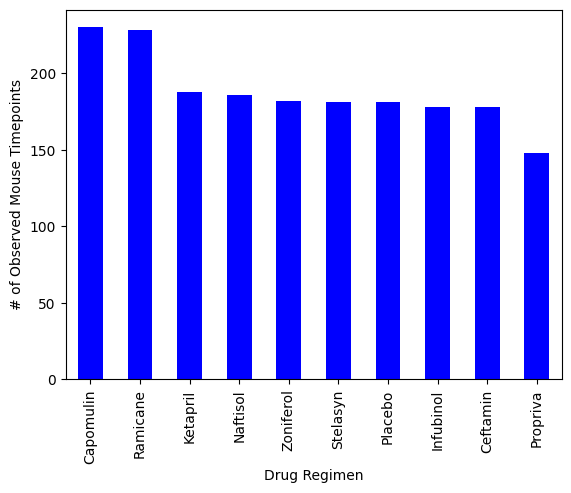

In [9]:
#Create a group based on timepoint with pandas 
drug_time = cleaned_df.groupby("Timepoint")

# Create a series that counts the count of drug regimen by timepoint groups 
mice_drug_df = cleaned_df['Drug Regimen'].value_counts()

# Plot dataframe
mice_drug_df.plot(kind='bar', ylabel="# of Observed Mouse Timepoints", color='b')
plt.show()

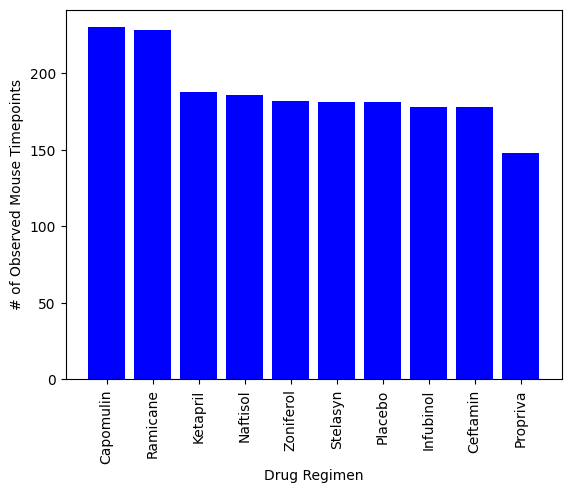

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = mice_drug_df.index
mice_count_time = [value for value in mice_drug_df]

plt.bar(drug_regimen, mice_count_time, color='b', align='center')
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


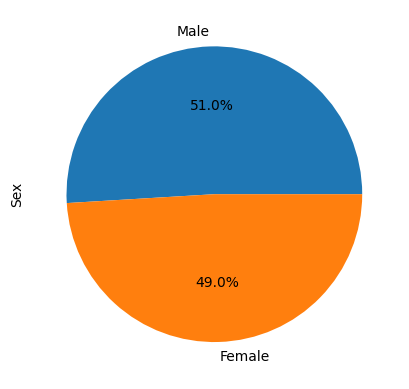

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_df["Sex"].value_counts()
gender_counts.plot(kind="pie", autopct="%1.1f%%", ylabel="Sex");
plt.show()

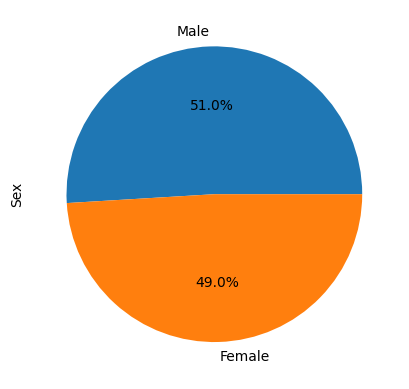

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create array for sex 
gender = gender_counts.index
gender_counts_list = [value for value in gender_counts]

plt.pie(gender_counts_list, labels = gender, startangle=360, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
effective_regimen_df = pd.DataFrame(cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") |
                                   (cleaned_df["Drug Regimen"] == "Ramicane") |
                                   (cleaned_df["Drug Regimen"] == "Infubinol") |
                                   (cleaned_df["Drug Regimen"] == "Ceftamin"), :])

# # Start by getting the last (greatest) timepoint for each mouse
mouse_max_timepoint = pd.DataFrame(effective_regimen_df.groupby(['Mouse ID'])['Timepoint'].max())

# # # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_tumour_df = pd.merge(mouse_max_timepoint, mouse_cancer_df, on= ["Mouse ID", "Timepoint"], how='inner')
new_tumour_df.reset_index(drop=True)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Create two empty lists for Regimen and final tumour vol per mouse new_tumour_df 
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] 
final_tumour_vol = []

# Create a loop to assess tumour vol for those on the regimen list 
for regimen in regimen_list: 
    
    mice_treatment = new_tumour_df.loc[new_tumour_df["Drug Regimen"] == regimen]
    
    # add subset 
    final_tumour_vol.append(mice_treatment['Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds
    quartiles = mice_treatment['Tumor Volume (mm3)'].quantile([0.25,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumour_vol[-1].loc[(final_tumour_vol[-1].values > upper_bound) | (final_tumour_vol[-1].values < lower_bound)]
    
    print(f"{regimen}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


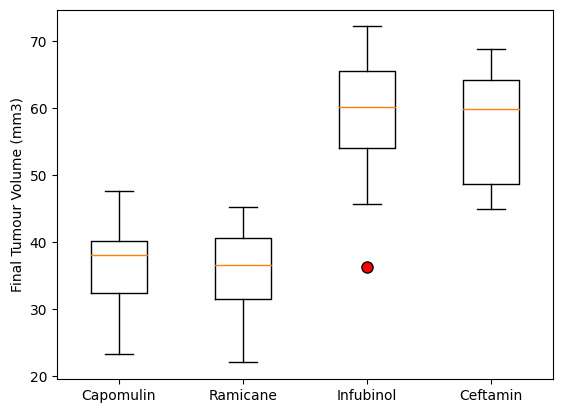

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots() 
ax1.set_ylabel("Final Tumour Volume (mm3)") 
boxplot = ax1.boxplot(final_tumour_vol, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})
ax1.set_xticklabels(regimen_list) 
plt.show()

## Line and Scatter Plots

['b128' 'j246' 'r554' 's185' 'b742' 'x401' 'l509' 's710' 'r157' 'u364'
 'j119' 'v923' 'w914' 'i738' 'r944' 'y793' 'g316' 'g288' 'l897' 'w150'
 't565' 'i557' 'm957' 'f966' 'm601']


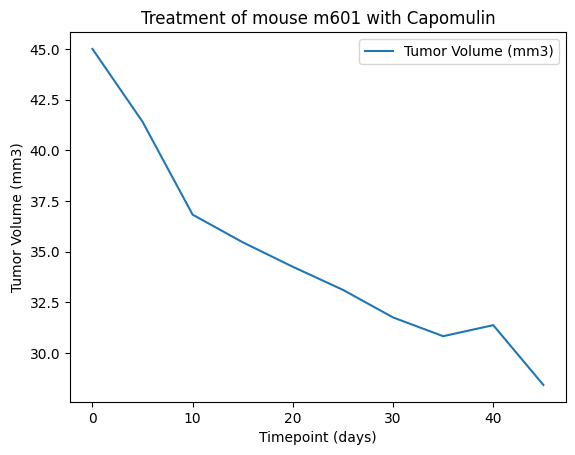

In [16]:
# Create variables for the treatment of choice 
treatment = "Capomulin" 
capomulin_mice = cleaned_df.loc[cleaned_df['Drug Regimen']== "Capomulin",:]

# Choose Mice from Capomulin group 
choose = capomulin_mice['Mouse ID'].unique()
print(choose)

#Choose a mouse from the list above 
mouse_ID= "m601" 

# Create a series for the chosen mouse 
mouse_ID_df = cleaned_df.loc[cleaned_df["Mouse ID"] == mouse_ID, ['Timepoint', 'Tumor Volume (mm3)']]

# Generate a line plot of tumor volume vs. time point for mouse selected 
mouse_ID_df.plot(kind='line', x='Timepoint', y= 'Tumor Volume (mm3)', 
                 xlabel = 'Timepoint (days)', ylabel ='Tumor Volume (mm3)', 
                 title = f"Treatment of mouse {mouse_ID} with {treatment}")
plt.show() 

## Correlation and Regression

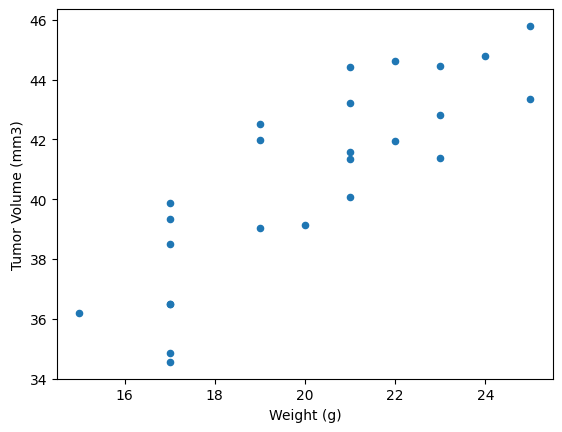

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_data = capomulin_mice.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}) 
average_data

#Plot all components 
average_data.plot(kind="scatter", x= "Weight (g)", y = 'Tumor Volume (mm3)')

plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


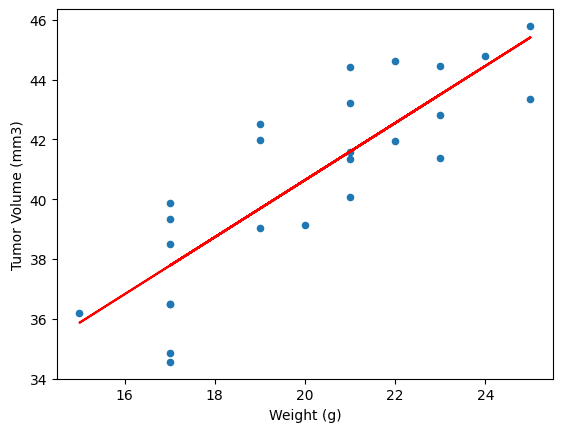

In [18]:
# Calculate the correlation coefficient and a linear regression model
x_values = average_data["Weight (g)"]
y_values = average_data["Tumor Volume (mm3)"]

# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Plot all components 
average_data.plot(kind="scatter", x= "Weight (g)", y = 'Tumor Volume (mm3)')
plt.plot(x_values, slope * x_values + intercept, color='red')

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.show()